# 1. Gathering taxonomic journals

We gathered taxonomic journals through three sources:
 - We used Wikidata to find all academic or scientific journals with a main subject or field of work related to taxonomy, phylogeny, nomenclature,...
 - We used Wikidata to find all journals that had an IPNI or ZooBank publication ID.
 - We used the OpenAlex API to retrieve all journals that were related to "taxonomy", i.e. with the concept "taxonomy" linked to it.

Here, we take a quick look at the results.

In [1]:
import pandas as pd
from matplotlib_venn import venn3
from matplotlib import pyplot as plt

In [2]:
journals = pd.read_csv("../data/processed/journals.csv")
journals

,title,wikidataURL,ISSN-L,IPNIpubID,ZooBankPubID,openAlexID,dissolvedYear,dissolved,source
0,Ornithology,http://www.wikidata.org/entity/Q2300649,0004-8038,NaN,3F3F951F-B494-44B0-B286-AF9BCB097966,S152904045,NaN,NaN,Wikidata taxonomic subject
1,Ornithology,http://www.wikidata.org/entity/Q2300649,0004-8038,NaN,3F3F951F-B494-44B0-B286-AF9BCB097966,S152904045,NaN,NaN,Wikidata taxonomic subject
2,ZooKeys,http://www.wikidata.org/entity/Q219980,1313-2970,NaN,91BD42D4-90F1-4B45-9350-EEF175B1727A,S199213172,NaN,NaN,Wikidata taxonomic subject
3,ZooKeys,http://www.wikidata.org/entity/Q219980,1313-2970,NaN,91BD42D4-90F1-4B45-9350-EEF175B1727A,S199213172,NaN,NaN,Wikidata taxonomic subject
4,Zootaxa,http://www.wikidata.org/entity/Q220370,1175-5326,NaN,78F99150-21C2-4639-B359-F3E2302DF0B7,S171471881,NaN,NaN,Wikidata taxonomic subject
...,...,...,...,...,...,...,...,...,...
3061,Progress in molecular and subcellular biology,https://www.wikidata.org/entity/Q27710179,2363-7684,NaN,NaN,S4210207345,before 2012,True,OpenAlex taxonomy concept
3062,Advances in Evolutionary Biology,http://www.wikidata.org/entity/Q27726196,2314-7660,NaN,NaN,S4210228732,2015,False,OpenAlex taxonomy concept
3063,Sternbergiana,NaN,2695-1118,NaN,NaN,S4210236945,2021,False,OpenAlex taxonomy concept
3064,Agricultural Gazette of New South Wales,https://www.wikidata.org/entity/Q31845337,0002-1474,NaN,NaN,S4210172420,NaN,NaN,OpenAlex taxonomy concept


In [3]:
# number of journals per source
journals["source"].value_counts()

IPNI or ZooBank ID            2830
OpenAlex taxonomy concept      155
Wikidata taxonomic subject      81
Name: source, dtype: int64

In [4]:
print("Number of unique journals (by title): " +
      str(len(journals.drop_duplicates(subset="title", ignore_index=True))))

Number of unique journals (by title): 2152


In [5]:
ipnizoo = set(journals[journals["source"]=="IPNI or ZooBank ID"]["title"])
openalex = set(journals[journals["source"]=="OpenAlex taxonomy concept"]["title"])
wikisubjects = set(journals[journals["source"]=="Wikidata taxonomic subject"]["title"])

In [6]:
print("Number of journals found via IPNI or ZooBank ID, not found via OpenAlex: " +
      str(len(ipnizoo - openalex)))
print("Number of journals found via IPNI or ZooBank ID, not found via Wikidata subjects: " +
      str(len(ipnizoo - wikisubjects)))

Number of journals found via IPNI or ZooBank ID, not found via OpenAlex: 1992
Number of journals found via IPNI or ZooBank ID, not found via Wikidata subjects: 2024


In [7]:
print("Number of journals found via Wikidata subjects, not found via OpenAlex: " +
      str(len(wikisubjects - openalex)))
print("Number of journals found via Wikidata subjects, not found via IPNI or ZooBank ID: " +
      str(len(wikisubjects - ipnizoo)))

Number of journals found via Wikidata subjects, not found via OpenAlex: 24
Number of journals found via Wikidata subjects, not found via IPNI or ZooBank ID: 8


In [8]:
print("Number of journals found via OpenAlex, not found via Wikidata subjects: " +
      str(len(openalex - wikisubjects)))
print("Number of journals found via OpenAlex subjects, not found via IPNI or ZooBank ID: " +
      str(len(openalex - ipnizoo)))

Number of journals found via OpenAlex, not found via Wikidata subjects: 141
Number of journals found via OpenAlex subjects, not found via IPNI or ZooBank ID: 93


In [9]:
print("Number of journals in common\n")
print("OpenAlex and IPNI/ZooBank IDs: " +
      str(len(openalex.intersection(ipnizoo))))
print("OpenAlex and Wikidata subjects: " +
      str(len(openalex.intersection(wikisubjects))))
print("Wikidata subjects and IPNI/ZooBank IDs: " +
      str(len(wikisubjects.intersection(ipnizoo))))
print("OpenAlex, Wikidata subjects and IPNI/ZooBank IDs: " +
      str(len(openalex.intersection(wikisubjects).intersection(ipnizoo))))

Number of journals in common

OpenAlex and IPNI/ZooBank IDs: 59
OpenAlex and Wikidata subjects: 11
Wikidata subjects and IPNI/ZooBank IDs: 27
OpenAlex, Wikidata subjects and IPNI/ZooBank IDs: 11


In [10]:
# number of journals with an OpenAlex ID per source
journals[journals["openAlexID"]==journals["openAlexID"]]["source"].value_counts()

IPNI or ZooBank ID            1207
OpenAlex taxonomy concept      155
Wikidata taxonomic subject      68
Name: source, dtype: int64

In [11]:
# number of journals that were not recently dissolved (or not confirmed dissolved) per source
journals[(journals["dissolved"]==False) | (journals["dissolved"]!=journals["dissolved"])]["source"].value_counts()

IPNI or ZooBank ID            2299
OpenAlex taxonomy concept      122
Wikidata taxonomic subject      78
Name: source, dtype: int64

Text(0.5, 1.0, 'Unique journals per source')

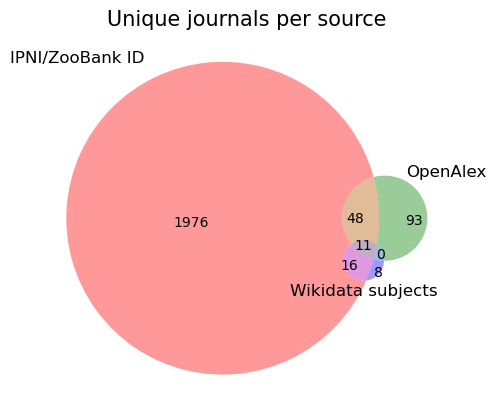

In [13]:
# venn diagram
venn3([ipnizoo, openalex, wikisubjects], ("IPNI/ZooBank ID", "OpenAlex", "Wikidata subjects"))
plt.title("Unique journals per source", fontsize=15)